In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model

In [2]:
#loading the data set
df=pd.read_csv('Downloads\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.shape

(768, 9)

In [8]:
np.sqrt(768)

27.712812921102035

In [9]:
#numpy array for feature and target
x=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [11]:
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))


In [42]:
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    

In [43]:
knn

KNeighborsClassifier(n_neighbors=8)

In [13]:
    knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [14]:
knn.score(x_train,y_train)

0.7821229050279329

In [15]:
knn.score(x_test,y_test)


0.7489177489177489

In [74]:
knn.predict([[9,136,80,25,89,25.2,0.776,45]])

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [16]:
y_hat=knn.predict(x_test)

In [22]:
cm=metrics.confusion_matrix(y_test,y_hat)
cm

array([[139,  18],
       [ 40,  34]], dtype=int64)

<AxesSubplot:>

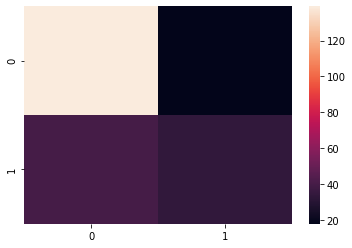

In [18]:
sns.heatmap(cm)

In [25]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.65      0.46      0.54        74

    accuracy                           0.75       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.74      0.75      0.74       231



In [28]:
df['Outcome'].value_counts()/df['Outcome'].value_counts().sum()*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [29]:
#imbalanced data set

In [33]:
smote=SMOTE(sampling_strategy='minority')
x_s,y_s=smote.fit_resample(x_train,y_train)

In [53]:
knn1=KNeighborsClassifier(n_neighbors=8)
knn1.fit(x_s,y_s)

KNeighborsClassifier(n_neighbors=8)

In [54]:
y_pred=knn1.predict(x_test)

In [55]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       157
           1       0.54      0.61      0.57        74

    accuracy                           0.71       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.72      0.71      0.71       231



In [123]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=16)

In [124]:
dt.fit(x_s,y_s)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=16)

In [125]:
y_pred1=dt.predict(x_test)

In [126]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       157
           1       0.62      0.66      0.64        74

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.77      0.76      0.76       231



In [130]:
log=linear_model.LogisticRegression(solver='liblinear',fit_intercept='True')
log.fit(x_s,y_s)

LogisticRegression(fit_intercept='True', solver='liblinear')

In [132]:
y_h1=log.predict(x_test)


In [135]:
print(metrics.classification_report(y_test,y_h1))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       157
           1       0.59      0.70      0.64        74

    accuracy                           0.75       231
   macro avg       0.72      0.74      0.72       231
weighted avg       0.76      0.75      0.75       231



In [136]:
# decision tree gave best accuracy out of all the models